In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

In [4]:
accidentes = pd.read_csv('accidentes.csv')
vehiculos = pd.read_csv('vehiculos.csv')

In [5]:
print(accidentes.shape)
for i in accidentes.columns:
    print(f"{i[:20]:<20} - {accidentes[i].isnull().sum()}")

(136621, 33)
Accident_Index       - 0
1st_Road_Class       - 0
1st_Road_Number      - 0
2nd_Road_Class       - 0
2nd_Road_Number      - 617
Accident_Severity    - 0
Carriageway_Hazards  - 0
Date                 - 0
Day_of_Week          - 0
Did_Police_Officer_A - 0
Junction_Control     - 0
Junction_Detail      - 0
Latitude             - 7
Light_Conditions     - 0
Local_Authority_(Dis - 0
Local_Authority_(Hig - 0
Location_Easting_OSG - 7
Location_Northing_OS - 7
Longitude            - 7
LSOA_of_Accident_Loc - 0
Number_of_Casualties - 0
Number_of_Vehicles   - 0
Pedestrian_Crossing- - 185
Pedestrian_Crossing- - 631
Police_Force         - 0
Road_Surface_Conditi - 0
Road_Type            - 0
Special_Conditions_a - 0
Speed_limit          - 37
Time                 - 0
Urban_or_Rural_Area  - 0
Weather_Conditions   - 0
InScotland           - 0


In [6]:
print(vehiculos.shape)
for i in vehiculos.columns:
    print(i, vehiculos[i].isnull().sum())

(252500, 23)
Accident_Index 0
Age_Band_of_Driver 0
Age_of_Vehicle 68175
Driver_Home_Area_Type 0
Driver_IMD_Decile 67565
Engine_Capacity_.CC. 58780
Hit_Object_in_Carriageway 0
Hit_Object_off_Carriageway 0
Journey_Purpose_of_Driver 0
Junction_Location 0
make 0
model 0
Propulsion_Code 0
Sex_of_Driver 0
Skidding_and_Overturning 0
Towing_and_Articulation 0
Vehicle_Leaving_Carriageway 0
Vehicle_Location.Restricted_Lane 960
Vehicle_Manoeuvre 0
Vehicle_Reference 0
Vehicle_Type 0
Was_Vehicle_Left_Hand_Drive 0
X1st_Point_of_Impact 0


In [7]:
### Merge by Accident_Index
accidentes_vehiculos = pd.merge(accidentes, vehiculos, on='Accident_Index', how='inner')

In [8]:
print(accidentes_vehiculos.shape)
drop = []
for i in accidentes_vehiculos.columns:
    print(i, accidentes_vehiculos[i].isnull().sum())
    if accidentes_vehiculos[i].isnull().sum() > 0 and accidentes_vehiculos[i].isnull().sum() < 1210:
        drop.append(i)

(252500, 55)
Accident_Index 0
1st_Road_Class 0
1st_Road_Number 0
2nd_Road_Class 0
2nd_Road_Number 1208
Accident_Severity 0
Carriageway_Hazards 0
Date 0
Day_of_Week 0
Did_Police_Officer_Attend_Scene_of_Accident 0
Junction_Control 0
Junction_Detail 0
Latitude 12
Light_Conditions 0
Local_Authority_(District) 0
Local_Authority_(Highway) 0
Location_Easting_OSGR 12
Location_Northing_OSGR 12
Longitude 12
LSOA_of_Accident_Location 0
Number_of_Casualties 0
Number_of_Vehicles 0
Pedestrian_Crossing-Human_Control 377
Pedestrian_Crossing-Physical_Facilities 1108
Police_Force 0
Road_Surface_Conditions 0
Road_Type 0
Special_Conditions_at_Site 0
Speed_limit 65
Time 0
Urban_or_Rural_Area 0
Weather_Conditions 0
InScotland 0
Age_Band_of_Driver 0
Age_of_Vehicle 68175
Driver_Home_Area_Type 0
Driver_IMD_Decile 67565
Engine_Capacity_.CC. 58780
Hit_Object_in_Carriageway 0
Hit_Object_off_Carriageway 0
Journey_Purpose_of_Driver 0
Junction_Location 0
make 0
model 0
Propulsion_Code 0
Sex_of_Driver 0
Skidding_and_

In [9]:
print(drop)

['2nd_Road_Number', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit', 'Vehicle_Location.Restricted_Lane']


In [10]:
### Remove duplicates
accidentes_vehiculos = accidentes_vehiculos.drop_duplicates(subset=['Accident_Index', 'Vehicle_Reference'], keep='first')

In [11]:
### Remove Nulls 
accidentes_vehiculos = accidentes_vehiculos.dropna(subset=drop)

In [12]:
print(accidentes_vehiculos.shape)
for i in accidentes_vehiculos.columns:
    print(i, accidentes_vehiculos[i].isnull().sum())

(249581, 55)
Accident_Index 0
1st_Road_Class 0
1st_Road_Number 0
2nd_Road_Class 0
2nd_Road_Number 0
Accident_Severity 0
Carriageway_Hazards 0
Date 0
Day_of_Week 0
Did_Police_Officer_Attend_Scene_of_Accident 0
Junction_Control 0
Junction_Detail 0
Latitude 0
Light_Conditions 0
Local_Authority_(District) 0
Local_Authority_(Highway) 0
Location_Easting_OSGR 0
Location_Northing_OSGR 0
Longitude 0
LSOA_of_Accident_Location 0
Number_of_Casualties 0
Number_of_Vehicles 0
Pedestrian_Crossing-Human_Control 0
Pedestrian_Crossing-Physical_Facilities 0
Police_Force 0
Road_Surface_Conditions 0
Road_Type 0
Special_Conditions_at_Site 0
Speed_limit 0
Time 0
Urban_or_Rural_Area 0
Weather_Conditions 0
InScotland 0
Age_Band_of_Driver 0
Age_of_Vehicle 67000
Driver_Home_Area_Type 0
Driver_IMD_Decile 66426
Engine_Capacity_.CC. 57690
Hit_Object_in_Carriageway 0
Hit_Object_off_Carriageway 0
Journey_Purpose_of_Driver 0
Junction_Location 0
make 0
model 0
Propulsion_Code 0
Sex_of_Driver 0
Skidding_and_Overturning 0

In [13]:
### Remove columns with more than 1000 nulls
drop = []
for i in accidentes_vehiculos.columns:
    if accidentes_vehiculos[i].isnull().sum() > 1200:
        drop.append(i)
print(drop)

['Age_of_Vehicle', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.']


In [14]:
accidentes_vehiculos.drop(columns=drop, inplace=True)
print(accidentes_vehiculos.shape)

(249581, 52)


In [15]:
print(accidentes_vehiculos.shape)
for i in accidentes_vehiculos.columns:
    print(f"{i[:20]:<20} - {accidentes_vehiculos[i].isnull().sum():<3} - {str(accidentes_vehiculos[i].dtype):<8} - {accidentes_vehiculos[i].nunique()}")

(249581, 52)
Accident_Index       - 0   - object   - 135072
1st_Road_Class       - 0   - object   - 6
1st_Road_Number      - 0   - float64  - 4169
2nd_Road_Class       - 0   - object   - 7
2nd_Road_Number      - 0   - float64  - 3571
Accident_Severity    - 0   - object   - 3
Carriageway_Hazards  - 0   - object   - 7
Date                 - 0   - object   - 366
Day_of_Week          - 0   - object   - 7
Did_Police_Officer_A - 0   - object   - 2
Junction_Control     - 0   - object   - 6
Junction_Detail      - 0   - object   - 10
Latitude             - 0   - float64  - 127834
Light_Conditions     - 0   - object   - 6
Local_Authority_(Dis - 0   - object   - 380
Local_Authority_(Hig - 0   - object   - 207
Location_Easting_OSG - 0   - float64  - 93974
Location_Northing_OS - 0   - float64  - 96425
Longitude            - 0   - float64  - 129180
LSOA_of_Accident_Loc - 0   - object   - 28575
Number_of_Casualties - 0   - int64    - 22
Number_of_Vehicles   - 0   - int64    - 14
Pedestrian_Crossing- 

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Para no perder la info original
df_encoded = accidentes_vehiculos.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [17]:

corr_matrix = df_scaled.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

print("Pares de variables con correlación > 95%:\n")
for col in upper.columns:
    for row in upper.index:
        corr_value = upper.loc[row, col]
        if pd.notnull(corr_value) and corr_value > 0.95:
            print(f"{row} se correlaciona con {col} en un {corr_value*100:.2f}%")


Pares de variables con correlación > 95%:

Accident_Index se correlaciona con Local_Authority_(District) en un 98.36%
Accident_Index se correlaciona con Local_Authority_(Highway) en un 97.67%
Local_Authority_(District) se correlaciona con Local_Authority_(Highway) en un 97.85%
Latitude se correlaciona con Location_Northing_OSGR en un 100.00%
Location_Easting_OSGR se correlaciona con Longitude en un 99.94%
Accident_Index se correlaciona con Police_Force en un 98.33%
Local_Authority_(District) se correlaciona con Police_Force en un 99.43%
Local_Authority_(Highway) se correlaciona con Police_Force en un 98.61%


In [18]:
columns_to_drop = [
    'Accident_Index',               # ID único, no aporta a modelos predictivos
    'Local_Authority_(District)',   # Muy correlacionada con Highway y Police_Force
    'Local_Authority_(Highway)',    # Igual que arriba
    'Location_Northing_OSGR',       # Muy correlacionada con Latitude
    'Location_Easting_OSGR'         # Muy correlacionada con Longitude
]
df_cleaned = df_encoded.drop(columns=columns_to_drop)
print(df_cleaned.shape)


(249581, 47)


In [22]:
df_cleaned = df_cleaned.dropna(axis=0, how='all')
print(df_cleaned.shape)

(249581, 47)


In [24]:
pca = PCA(n_components=0.95)
pca.fit(df_cleaned)
df_pca = pca.transform(df_cleaned)
print(df_pca.shape)



(249581, 2)


In [26]:
df_scaled.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
0,0.000000,0.0,0.403912,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.00,0.0,0.0
1,0.000000,0.0,0.403912,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.055556,0.05,0.05,0.0,0.2
2,0.000007,0.0,0.020871,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.166667,0.0,0.111111,0.0,0.055556,0.00,0.10,0.0,0.4
3,0.000015,0.0,0.405324,0.333333,0.402040,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.333333,0.0,0.000000,0.0,0.055556,0.00,0.10,0.0,0.2
4,0.000022,0.0,0.021879,0.333333,0.021702,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.055556,0.00,0.15,0.0,0.6


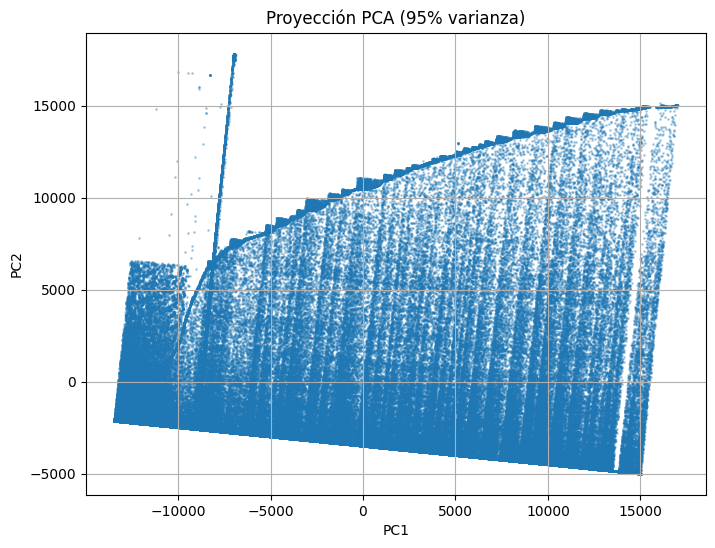

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3, s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA (95% varianza)')
plt.grid(True)
plt.show()


In [27]:
components_df = pd.DataFrame(pca.components_, columns=df_cleaned.columns)

# Top 10 más influyentes en PC1
print("Top 10 variables que más influyen en PC1:")
print(components_df.loc[0].abs().sort_values(ascending=False).head(10))

# Top 10 más influyentes en PC2
print("\nTop 10 variables que más influyen en PC2:")
print(components_df.loc[1].abs().sort_values(ascending=False).head(10))


Top 10 variables que más influyen en PC1:
LSOA_of_Accident_Location    0.994887
model                        0.100379
1st_Road_Number              0.009973
2nd_Road_Number              0.003686
Time                         0.002976
Police_Force                 0.001225
Speed_limit                  0.000377
make                         0.000128
Date                         0.000104
Latitude                     0.000070
Name: 0, dtype: float64

Top 10 variables que más influyen en PC2:
model                        0.994946
LSOA_of_Accident_Location    0.100387
2nd_Road_Number              0.001496
make                         0.001116
1st_Road_Number              0.000562
Time                         0.000536
Date                         0.000442
Speed_limit                  0.000178
Vehicle_Type                 0.000061
Propulsion_Code              0.000049
Name: 1, dtype: float64


In [28]:
df_reduced = df_cleaned.drop(columns=['LSOA_of_Accident_Location', 'model'])
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_reduced)
print(df_pca.shape)


(249581, 2)


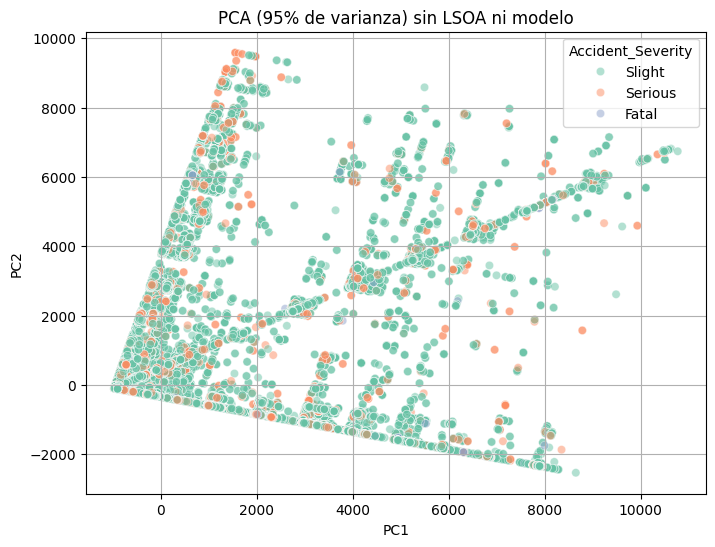

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_pca[:, 0],
    y=df_pca[:, 1],
    hue=accidentes_vehiculos['Accident_Severity'],  # si te interesa visualizar por severidad
    palette='Set2',
    alpha=0.5
)
plt.title('PCA (95% de varianza) sin LSOA ni modelo')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [32]:
# ==========================================
# 0. Configuración e importaciones
# ==========================================
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import umap.umap_ as umap          # pip install umap-learn
import hdbscan                     # pip install hdbscan

warnings.filterwarnings("ignore")
plt.rcParams["figure.dpi"] = 110

# ==========================================
# 1. Carga y unión de datasets
# ==========================================
accidentes = pd.read_csv("accidentes.csv")
vehiculos  = pd.read_csv("vehiculos.csv")

df = (
    accidentes
    .merge(vehiculos, on="Accident_Index", how="inner")
    .drop_duplicates(subset=["Accident_Index", "Vehicle_Reference"], keep="first")
)

# ==========================================
# 2. Limpieza rápida de nulos
# ==========================================
null_ratio = df.isna().mean()
cols_to_drop_null = null_ratio[null_ratio > 0.30].index
df.drop(columns=cols_to_drop_null, inplace=True)
df.dropna(axis=0, inplace=True)

# ==========================================
# 3. Excluir columnas irrelevantes
# ==========================================
exclude = [
    "Accident_Index",
    "Vehicle_Reference",
    "LSOA_of_Accident_Location",
    "model"
]
df.drop(columns=[c for c in exclude if c in df.columns], inplace=True)

# ==========================================
# 4. Tipos de columnas
# ==========================================
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

# ==========================================
# 5. Pipelines
#    - Numéricas: imputación + estandarización
#    - Categóricas: imputación + ordinal encoding
# ==========================================
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

pre = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
], remainder="drop")

X_pre = pre.fit_transform(df)
print(f"Dimensión tras pre-procesado: {X_pre.shape}")

# ==========================================
# 6. UMAP
# ==========================================
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=30,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)
X_umap = umap_model.fit_transform(X_pre)
print(f"Embedding UMAP: {X_umap.shape}")

# ==========================================
# 7. HDBSCAN
# ==========================================
hdb = hdbscan.HDBSCAN(min_cluster_size=250, min_samples=10)
clusters_hdb = hdb.fit_predict(X_umap)

# ==========================================
# 8. K-means con búsqueda de k
# ==========================================
best_k, best_sil = 2, -1
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    lbl = km.fit_predict(X_umap)
    sil = silhouette_score(X_umap, lbl)
    if sil > best_sil:
        best_k, best_sil = k, sil

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters_km = kmeans_final.fit_predict(X_umap)
print(f"Mejor k según silueta: {best_k} (score={best_sil:.3f})")

# ==========================================
# 9. Visualización
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1],
                hue=clusters_hdb, palette="viridis",
                s=5, ax=axes[0], legend=False)
axes[0].set_title("UMAP + HDBSCAN")

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1],
                hue=clusters_km, palette="tab10",
                s=5, ax=axes[1], legend=False)
axes[1].set_title(f"UMAP + K-means (k={best_k})")

for ax in axes:
    ax.set_xlabel("UMAP-1")
    ax.set_ylabel("UMAP-2")

plt.tight_layout()
plt.show()


Dimensión tras pre-procesado: (143864, 51)
Embedding UMAP: (143864, 2)


KeyboardInterrupt: 

Tomando muestra para clustering...
Muestra para clustering: (15000, 2)
Ejecutando HDBSCAN...
HDBSCAN completado. Clusters encontrados: 44
Buscando mejor k...
k=2: silhouette=0.487
k=3: silhouette=0.413
k=4: silhouette=0.375
k=5: silhouette=0.368
k=6: silhouette=0.393
k=7: silhouette=0.396
Mejor k: 2 (score=0.487)


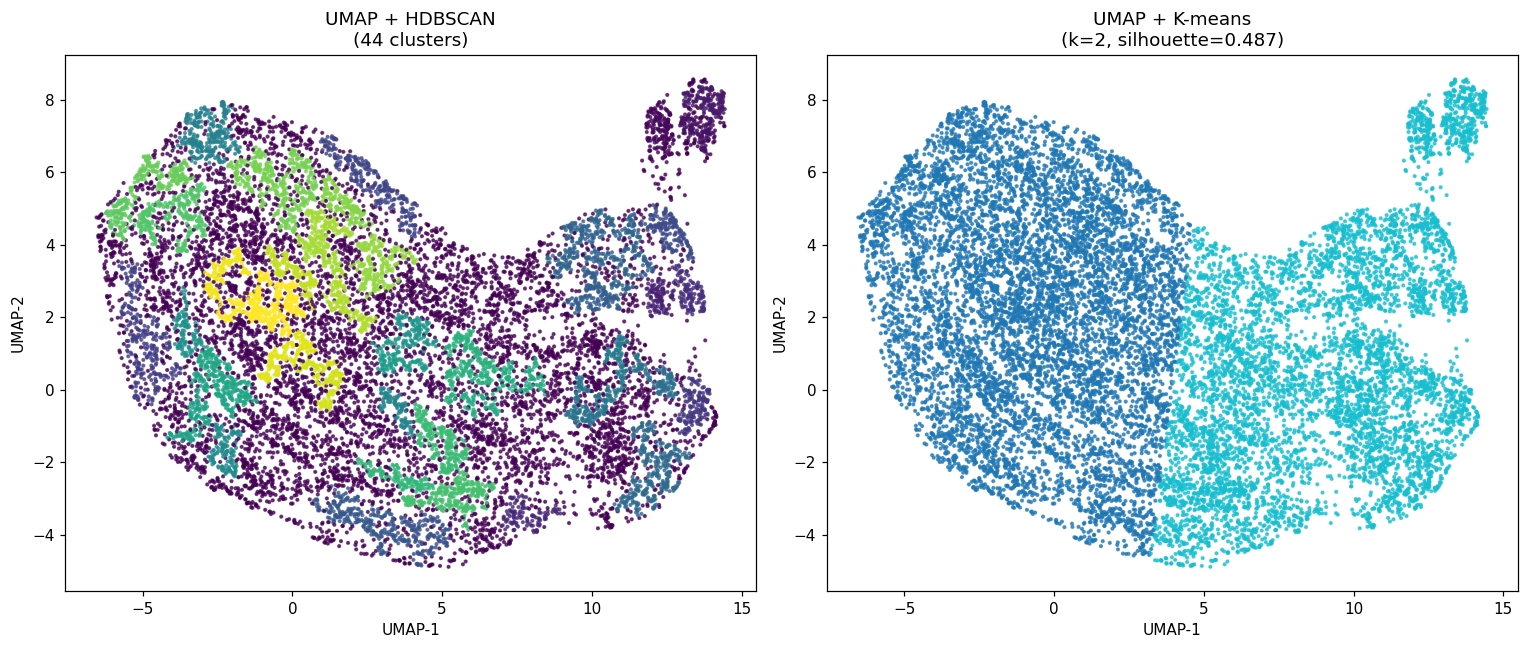


=== ESTADÍSTICAS ===
Dataset original: 143,864 puntos
Muestra utilizada: 15,000 puntos
HDBSCAN - Clusters: 44
HDBSCAN - Ruido: 6850 puntos
K-means - Clusters: 2
K-means - Silhouette: 0.487


In [33]:
# ==========================================
# Después de UMAP (línea donde ya tienes X_umap)
# ==========================================

# Tomar muestra estratificada para clustering más eficiente
print("Tomando muestra para clustering...")
sample_size = 15000  # Tamaño manejable para tu i5
np.random.seed(42)
sample_idx = np.random.choice(len(X_umap), min(sample_size, len(X_umap)), replace=False)
X_umap_sample = X_umap[sample_idx]
print(f"Muestra para clustering: {X_umap_sample.shape}")

# ==========================================
# HDBSCAN en muestra (mucho más rápido)
# ==========================================
print("Ejecutando HDBSCAN...")
hdb = hdbscan.HDBSCAN(
    min_cluster_size=100,   # Reducido para muestra
    min_samples=5,          # Reducido
    cluster_selection_method='leaf'  # Más rápido
)
clusters_hdb = hdb.fit_predict(X_umap_sample)
print(f"HDBSCAN completado. Clusters encontrados: {len(set(clusters_hdb)) - (1 if -1 in clusters_hdb else 0)}")

# ==========================================
# K-means optimizado
# ==========================================
print("Buscando mejor k...")
best_k, best_sil = 2, -1
silhouette_scores = []

for k in range(2, 8):  # Reducido el rango
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    lbl = km.fit_predict(X_umap_sample)
    sil = silhouette_score(X_umap_sample, lbl)
    silhouette_scores.append(sil)
    print(f"k={k}: silhouette={sil:.3f}")
    
    if sil > best_sil:
        best_k, best_sil = k, sil

print(f"Mejor k: {best_k} (score={best_sil:.3f})")

# Clustering final
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_km = kmeans_final.fit_predict(X_umap_sample)

# ==========================================
# Visualización
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# HDBSCAN
scatter1 = axes[0].scatter(X_umap_sample[:, 0], X_umap_sample[:, 1], 
                          c=clusters_hdb, cmap='viridis', s=3, alpha=0.7)
axes[0].set_title(f'UMAP + HDBSCAN\n({len(set(clusters_hdb)) - (1 if -1 in clusters_hdb else 0)} clusters)')
axes[0].set_xlabel('UMAP-1')
axes[0].set_ylabel('UMAP-2')

# K-means
scatter2 = axes[1].scatter(X_umap_sample[:, 0], X_umap_sample[:, 1], 
                          c=clusters_km, cmap='tab10', s=3, alpha=0.7)
axes[1].set_title(f'UMAP + K-means\n(k={best_k}, silhouette={best_sil:.3f})')
axes[1].set_xlabel('UMAP-1')
axes[1].set_ylabel('UMAP-2')

plt.tight_layout()
plt.show()

# ==========================================
# Estadísticas de los clusters
# ==========================================
print("\n=== ESTADÍSTICAS ===")
print(f"Dataset original: {len(X_umap):,} puntos")
print(f"Muestra utilizada: {len(X_umap_sample):,} puntos")
print(f"HDBSCAN - Clusters: {len(set(clusters_hdb)) - (1 if -1 in clusters_hdb else 0)}")
print(f"HDBSCAN - Ruido: {sum(clusters_hdb == -1)} puntos")
print(f"K-means - Clusters: {best_k}")
print(f"K-means - Silhouette: {best_sil:.3f}")

🚗 ANÁLISIS COMPLETO DE ACCIDENTES DE TRÁFICO

📊 1. CARGANDO Y PREPARANDO DATOS...
Accidentes: (136621, 33)
Vehículos: (252500, 23)
Dataset combinado: (252500, 55)

🔍 2. ANÁLISIS EXPLORATORIO...
Accidentes únicos: 136,621
Registros totales: 252,500

📈 Distribución de Severidad:
Accident_Severity
Slight     212109
Serious     37369
Fatal        3022
Name: count, dtype: int64

🚙 Top 10 Tipos de Vehículo:
Vehicle_Type
Car                                      179615
Pedal cycle                               19047
Van / Goods 3.5 tonnes mgw or under       13125
Motorcycle 125cc and under                 9152
Motorcycle over 500cc                      6704
Taxi/Private hire car                      5234
Bus or coach (17 or more pass seats)       4998
Goods 7.5 tonnes mgw and over              4262
Motorcycle over 125cc and up to 500cc      2232
Motorcycle 50cc and under                  1907
Name: count, dtype: int64

🌤️ Condiciones Climáticas:
Weather_Conditions
Fine no high winds       2089

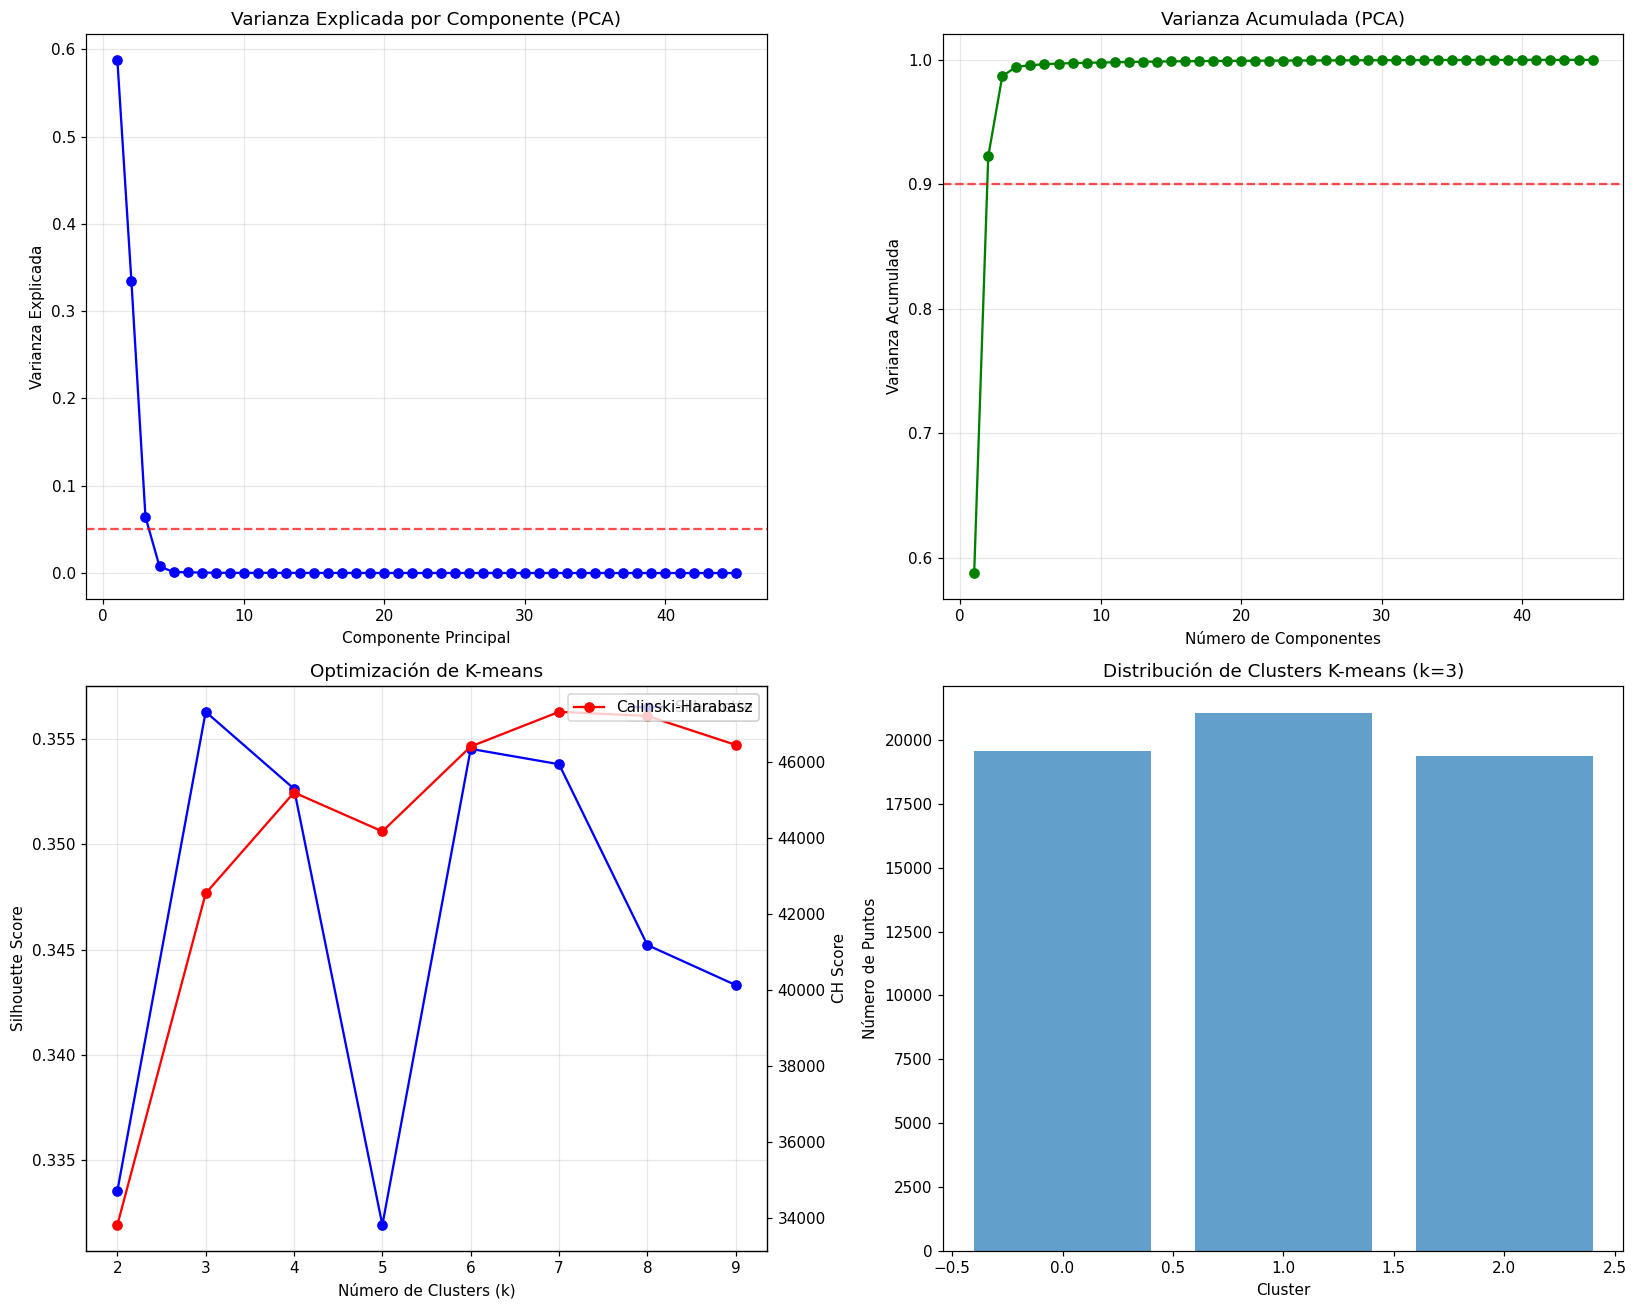

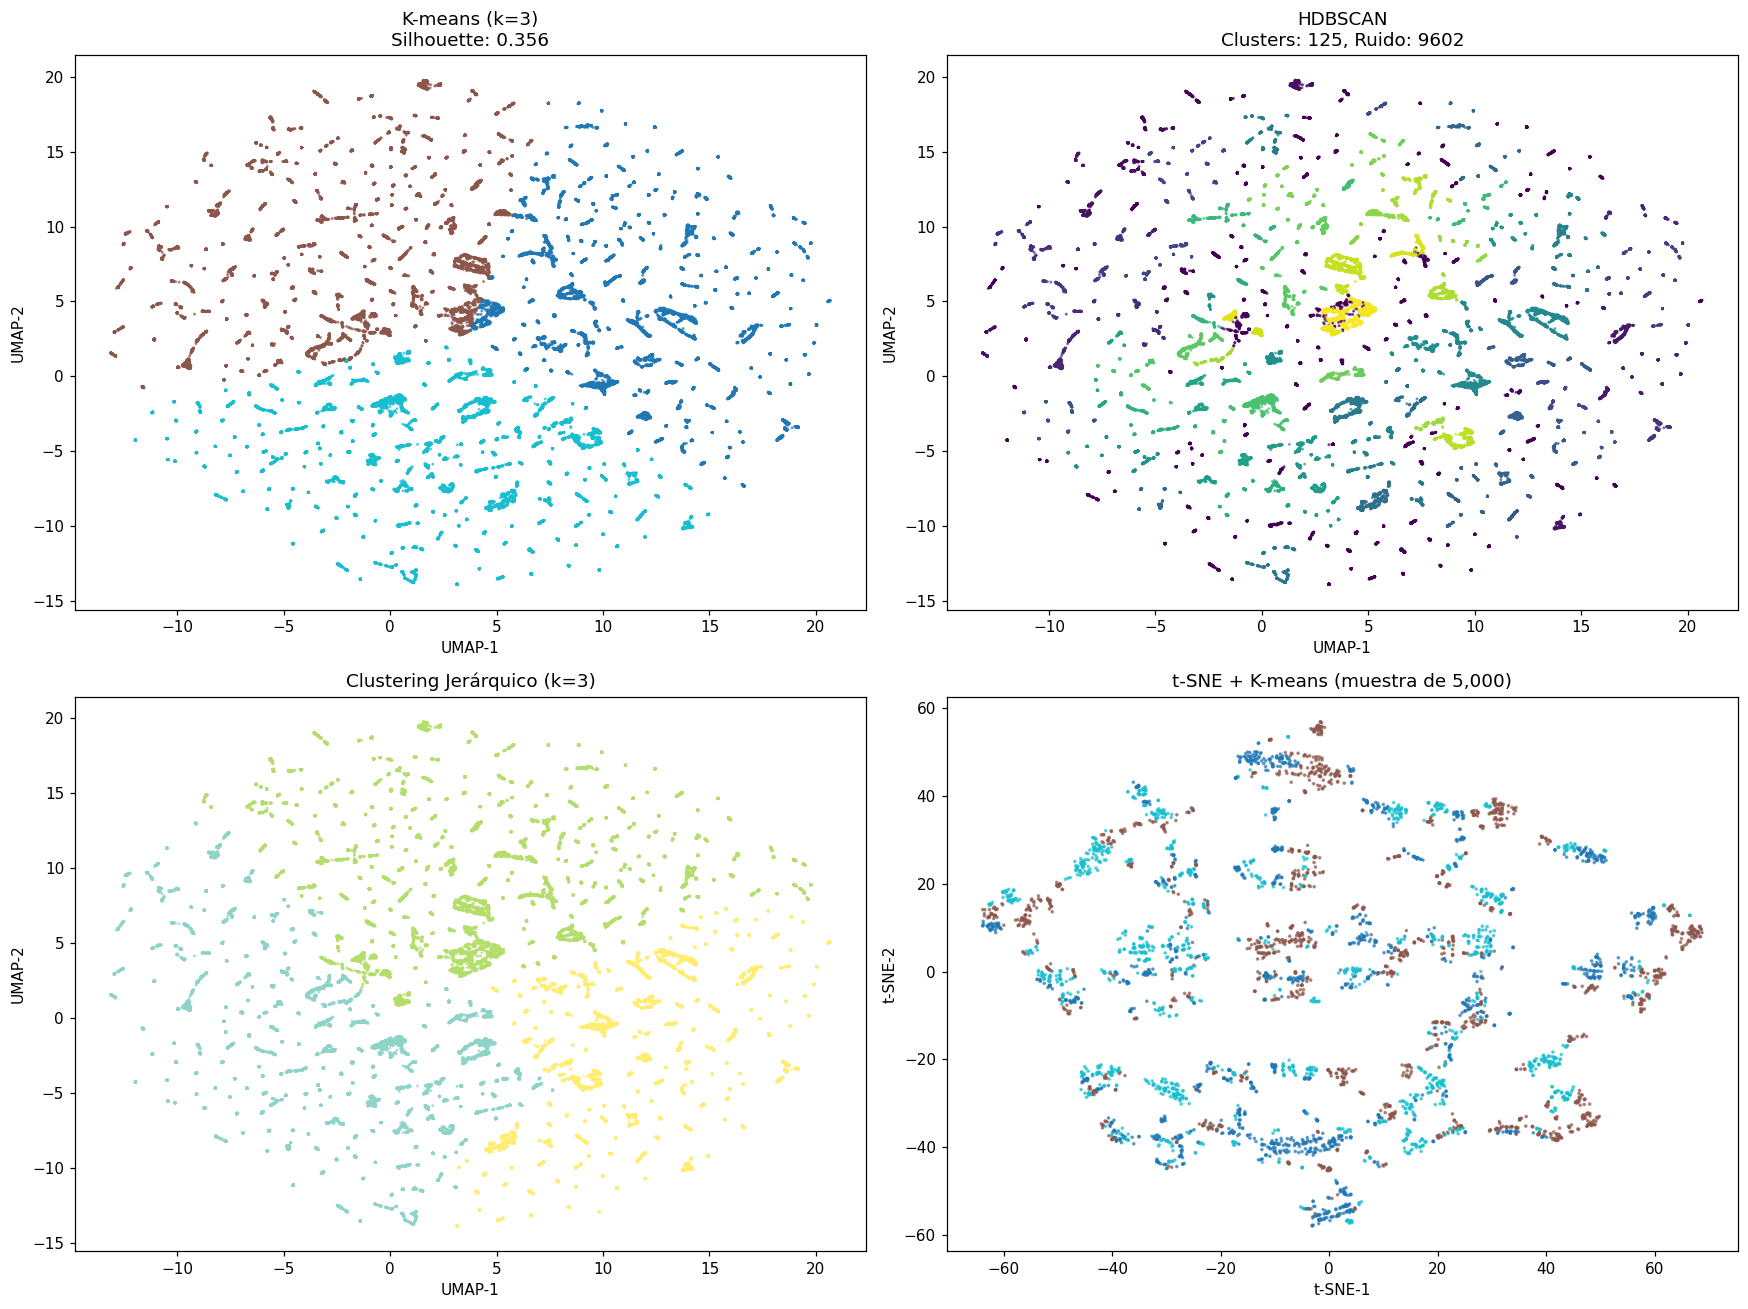


🔬 9. ANÁLISIS DE CLUSTERS...

📊 PERFIL DE CLUSTERS (K-MEANS):

🎯 CLUSTER 0 (19,583 registros, 32.6%)
   Severidad: {'Slight': 0.8493080733289077, 'Serious': 0.14047898687637236, 'Fatal': 0.01021293979471991}
   Vehículos: {'Car': 15656, 'Van / Goods 3.5 tonnes mgw or under': 993, 'Motorcycle 125cc and under': 722}
   Clima: {'Fine no high winds': 16240, 'Raining no high winds': 2081, 'Unknown': 425}
   Área: {'Urban': 0.6433641423683807, 'Rural': 0.35663585763161926}

🎯 CLUSTER 1 (21,055 registros, 35.1%)
   Severidad: {'Slight': 0.8411303728330563, 'Serious': 0.14804084540489196, 'Fatal': 0.01082878176205177}
   Vehículos: {'Car': 16342, 'Van / Goods 3.5 tonnes mgw or under': 1045, 'Motorcycle 125cc and under': 887}
   Clima: {'Fine no high winds': 17399, 'Raining no high winds': 2318, 'Unknown': 441}
   Área: {'Urban': 0.6200902398480171, 'Rural': 0.3799097601519829}

🎯 CLUSTER 2 (19,362 registros, 32.3%)
   Severidad: {'Slight': 0.8325586199772751, 'Serious': 0.15318665427125297, '

In [37]:
# ==========================================
# ANÁLISIS COMPLETO DE ACCIDENTES DE TRÁFICO
# ==========================================
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold
import umap.umap_ as umap
import hdbscan

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["figure.dpi"] = 110

print("🚗 ANÁLISIS COMPLETO DE ACCIDENTES DE TRÁFICO")
print("=" * 50)

# ==========================================
# 1. CARGA Y PREPARACIÓN DE DATOS
# ==========================================
print("\n📊 1. CARGANDO Y PREPARANDO DATOS...")

accidentes = pd.read_csv("accidentes.csv")
vehiculos = pd.read_csv("vehiculos.csv")

print(f"Accidentes: {accidentes.shape}")
print(f"Vehículos: {vehiculos.shape}")

# Merge
df = (
    accidentes
    .merge(vehiculos, on="Accident_Index", how="inner")
    .drop_duplicates(subset=["Accident_Index", "Vehicle_Reference"], keep="first")
)
print(f"Dataset combinado: {df.shape}")

# ==========================================
# 2. ANÁLISIS EXPLORATORIO INICIAL
# ==========================================
print("\n🔍 2. ANÁLISIS EXPLORATORIO...")

print(f"Accidentes únicos: {df['Accident_Index'].nunique():,}")
print(f"Registros totales: {len(df):,}")

print("\n📈 Distribución de Severidad:")
print(df['Accident_Severity'].value_counts())

print("\n🚙 Top 10 Tipos de Vehículo:")
print(df['Vehicle_Type'].value_counts().head(10))

print("\n🌤️ Condiciones Climáticas:")
print(df['Weather_Conditions'].value_counts().head())

# ==========================================
# 3. LIMPIEZA AVANZADA DE DATOS
# ==========================================
print("\n🧹 3. LIMPIEZA AVANZADA...")

# Eliminar columnas con muchos nulos
null_ratio = df.isna().mean()
cols_high_null = null_ratio[null_ratio > 0.5].index
print(f"Columnas con >50% nulos eliminadas: {len(cols_high_null)}")
df.drop(columns=cols_high_null, inplace=True)

# Eliminar columnas irrelevantes
exclude = [
    "Accident_Index", "Vehicle_Reference", "LSOA_of_Accident_Location", 
    "model", "Date", "Time", "Location_Easting_OSGR", "Location_Northing_OSGR"
]
df.drop(columns=[c for c in exclude if c in df.columns], inplace=True)

# Eliminar filas con nulos restantes
df.dropna(axis=0, inplace=True)
print(f"Dataset limpio: {df.shape}")

# ==========================================
# 4. ANÁLISIS DE CORRELACIONES
# ==========================================
print("\n🔗 4. ANÁLISIS DE CORRELACIONES...")

# Separar tipos de variables
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print(f"Variables numéricas: {len(num_cols)}")
print(f"Variables categóricas: {len(cat_cols)}")

# Matriz de correlación para variables numéricas
if len(num_cols) > 1:
    corr_matrix = df[num_cols].corr()
    
    # Encontrar correlaciones altas
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    print(f"\nPares con correlación >0.8: {len(high_corr_pairs)}")
    for col1, col2, corr in high_corr_pairs:
        print(f"  {col1} - {col2}: {corr:.3f}")
    
    # Eliminar una variable de cada par altamente correlacionado
    cols_to_remove = []
    for col1, col2, corr in high_corr_pairs:
        if col2 not in cols_to_remove:
            cols_to_remove.append(col2)
    
    if cols_to_remove:
        df.drop(columns=cols_to_remove, inplace=True)
        num_cols = [c for c in num_cols if c not in cols_to_remove]
        print(f"Variables eliminadas por alta correlación: {cols_to_remove}")

# Actualizar tipos de columnas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

# ==========================================
# 5. PREPROCESSING
# ==========================================
print("\n⚙️ 5. PREPROCESSING...")

# Pipelines de preprocessing
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
], remainder="drop")

X_processed = preprocessor.fit_transform(df)
print(f"Dimensión tras preprocessing: {X_processed.shape}")

# Eliminar características con varianza muy baja
variance_selector = VarianceThreshold(threshold=0.01)
X_processed = variance_selector.fit_transform(X_processed)
print(f"Dimensión tras filtro de varianza: {X_processed.shape}")

# Verificar que tengamos suficientes características
if X_processed.shape[1] < 2:
    print("⚠️ ADVERTENCIA: Muy pocas características después del filtrado!")
    print("Reduciendo threshold de varianza...")
    variance_selector = VarianceThreshold(threshold=0.001)
    X_processed = preprocessor.fit_transform(df)
    X_processed = variance_selector.fit_transform(X_processed)
    print(f"Nueva dimensión: {X_processed.shape}")

# ==========================================
# 6. REDUCCIÓN DIMENSIONAL
# ==========================================
print("\n📉 6. REDUCCIÓN DIMENSIONAL...")

# Tomar muestra para análisis más rápido
sample_size = min(60000, len(X_processed))
if len(X_processed) > sample_size:
    sample_idx = np.random.choice(len(X_processed), sample_size, replace=False)
    X_sample = X_processed[sample_idx]
    df_sample = df.iloc[sample_idx]
    print(f"Trabajando con muestra de {sample_size:,} registros")
else:
    X_sample = X_processed
    df_sample = df
    print(f"Usando dataset completo: {len(X_sample):,} registros")

print(f"Dimensiones finales para análisis: {X_sample.shape}")

# Verificación de seguridad
if X_sample.shape[1] < 2:
    print("❌ ERROR: Insuficientes características para análisis!")
    print("Revisar filtros de varianza y correlación")
else:
    print(f"✅ Dataset listo: {X_sample.shape[0]:,} muestras, {X_sample.shape[1]} características")

# PCA
print("Ejecutando PCA...")
n_features = X_sample.shape[1]
n_components_pca = min(50, n_features, len(X_sample))
print(f"Usando {n_components_pca} componentes para PCA (máximo posible: {min(n_features, len(X_sample))})")

pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X_sample)
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

# Encontrar componentes que explican 90% de varianza
n_components_90 = np.argmax(cumulative_var >= 0.9) + 1
print(f"Componentes para 90% varianza: {n_components_90}")

# UMAP
print("Ejecutando UMAP...")
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.1,
    metric="euclidean",
    random_state=42
)
X_umap = umap_model.fit_transform(X_sample)

# t-SNE (en subset más pequeño por eficiencia)
print("Ejecutando t-SNE...")
tsne_sample_size = min(5000, len(X_sample))
tsne_idx = np.random.choice(len(X_sample), tsne_sample_size, replace=False)
X_tsne_input = X_sample[tsne_idx]
tsne = TSNE(n_components=2, random_state=42, perplexity=50)
X_tsne = tsne.fit_transform(X_tsne_input)

# ==========================================
# 7. CLUSTERING
# ==========================================
print("\n🎯 7. CLUSTERING...")

# K-means con búsqueda del mejor k
print("Optimizando K-means...")
k_range = range(2, 10)
silhouette_scores = []
ch_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_umap)
    
    sil_score = silhouette_score(X_umap, labels)
    ch_score = calinski_harabasz_score(X_umap, labels)
    
    silhouette_scores.append(sil_score)
    ch_scores.append(ch_score)
    
    print(f"k={k}: Silhouette={sil_score:.3f}, CH={ch_score:.1f}")

best_k = k_range[np.argmax(silhouette_scores)]
print(f"Mejor k según Silhouette: {best_k}")

# Clustering final con K-means
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters_kmeans = kmeans_final.fit_predict(X_umap)

# HDBSCAN
print("Ejecutando HDBSCAN...")
hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=200,
    min_samples=10,
    cluster_selection_method='eom'
)
clusters_hdbscan = hdbscan_model.fit_predict(X_umap)
n_clusters_hdb = len(set(clusters_hdbscan)) - (1 if -1 in clusters_hdbscan else 0)
n_noise_hdb = sum(clusters_hdbscan == -1)

print(f"HDBSCAN - Clusters: {n_clusters_hdb}, Ruido: {n_noise_hdb}")

# Clustering Jerárquico
print("Ejecutando Clustering Jerárquico...")
hierarchical = AgglomerativeClustering(n_clusters=best_k)
clusters_hierarchical = hierarchical.fit_predict(X_umap)

# ==========================================
# 8. VISUALIZACIONES
# ==========================================
print("\n📊 8. GENERANDO VISUALIZACIONES...")

# Figura 1: Análisis de Componentes Principales
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# PCA - Varianza explicada
axes[0,0].plot(range(1, len(explained_var_ratio)+1), explained_var_ratio, 'bo-')
axes[0,0].axhline(y=0.05, color='r', linestyle='--', alpha=0.7)
axes[0,0].set_xlabel('Componente Principal')
axes[0,0].set_ylabel('Varianza Explicada')
axes[0,0].set_title('Varianza Explicada por Componente (PCA)')
axes[0,0].grid(True, alpha=0.3)

# PCA - Varianza acumulada
axes[0,1].plot(range(1, len(cumulative_var)+1), cumulative_var, 'go-')
axes[0,1].axhline(y=0.9, color='r', linestyle='--', alpha=0.7)
axes[0,1].set_xlabel('Número de Componentes')
axes[0,1].set_ylabel('Varianza Acumulada')
axes[0,1].set_title('Varianza Acumulada (PCA)')
axes[0,1].grid(True, alpha=0.3)

# Scores de clustering
axes[1,0].plot(k_range, silhouette_scores, 'bo-', label='Silhouette')
axes[1,0].set_xlabel('Número de Clusters (k)')
axes[1,0].set_ylabel('Silhouette Score')
axes[1,0].set_title('Optimización de K-means')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# CH Score
ax_ch = axes[1,0].twinx()
ax_ch.plot(k_range, ch_scores, 'ro-', label='Calinski-Harabasz')
ax_ch.set_ylabel('CH Score')
ax_ch.legend(loc='upper right')

# Distribución de clusters
cluster_counts = pd.Series(clusters_kmeans).value_counts().sort_index()
axes[1,1].bar(cluster_counts.index, cluster_counts.values, alpha=0.7)
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Número de Puntos')
axes[1,1].set_title(f'Distribución de Clusters K-means (k={best_k})')

plt.tight_layout()
plt.show()

# Figura 2: Comparación de Algoritmos de Clustering
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# K-means
scatter1 = axes[0,0].scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_kmeans, 
                            cmap='tab10', s=1, alpha=0.6)
axes[0,0].set_title(f'K-means (k={best_k})\nSilhouette: {silhouette_scores[best_k-2]:.3f}')
axes[0,0].set_xlabel('UMAP-1')
axes[0,0].set_ylabel('UMAP-2')

# HDBSCAN
scatter2 = axes[0,1].scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hdbscan, 
                            cmap='viridis', s=1, alpha=0.6)
axes[0,1].set_title(f'HDBSCAN\nClusters: {n_clusters_hdb}, Ruido: {n_noise_hdb}')
axes[0,1].set_xlabel('UMAP-1')
axes[0,1].set_ylabel('UMAP-2')

# Clustering Jerárquico
scatter3 = axes[1,0].scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_hierarchical, 
                            cmap='Set3', s=1, alpha=0.6)
axes[1,0].set_title(f'Clustering Jerárquico (k={best_k})')
axes[1,0].set_xlabel('UMAP-1')
axes[1,0].set_ylabel('UMAP-2')

# t-SNE (subset)
scatter4 = axes[1,1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                            c=clusters_kmeans[tsne_idx], cmap='tab10', s=2, alpha=0.6)
axes[1,1].set_title(f't-SNE + K-means (muestra de {tsne_sample_size:,})')
axes[1,1].set_xlabel('t-SNE-1')
axes[1,1].set_ylabel('t-SNE-2')

plt.tight_layout()
plt.show()

# ==========================================
# 9. ANÁLISIS DE CLUSTERS
# ==========================================
print("\n🔬 9. ANÁLISIS DE CLUSTERS...")

# Añadir clusters al dataframe de muestra
df_sample = df_sample.copy()
df_sample['Cluster_KMeans'] = clusters_kmeans
df_sample['Cluster_HDBSCAN'] = clusters_hdbscan

print("\n📊 PERFIL DE CLUSTERS (K-MEANS):")
print("="*40)

for cluster in sorted(df_sample['Cluster_KMeans'].unique()):
    cluster_data = df_sample[df_sample['Cluster_KMeans'] == cluster]
    print(f"\n🎯 CLUSTER {cluster} ({len(cluster_data):,} registros, {len(cluster_data)/len(df_sample)*100:.1f}%)")
    
    # Severidad de accidentes
    if 'Accident_Severity' in cluster_data.columns:
        severity = cluster_data['Accident_Severity'].value_counts(normalize=True)
        print(f"   Severidad: {severity.to_dict()}")
    
    # Tipo de vehículo más común
    if 'Vehicle_Type' in cluster_data.columns:
        vehicle = cluster_data['Vehicle_Type'].value_counts().head(3)
        print(f"   Vehículos: {vehicle.to_dict()}")
    
    # Condiciones climáticas
    if 'Weather_Conditions' in cluster_data.columns:
        weather = cluster_data['Weather_Conditions'].value_counts().head(3)
        print(f"   Clima: {weather.to_dict()}")
    
    # Área urbana/rural
    if 'Urban_or_Rural_Area' in cluster_data.columns:
        area = cluster_data['Urban_or_Rural_Area'].value_counts(normalize=True)
        print(f"   Área: {area.to_dict()}")

# ==========================================
# 10. RESUMEN EJECUTIVO
# ==========================================
print("\n" + "="*60)
print("📋 RESUMEN EJECUTIVO")
print("="*60)
print(f"📊 Dataset procesado: {len(df_sample):,} registros de {X_processed.shape[1]} características")
print(f"🎯 Mejor configuración: K-means con k={best_k} (Silhouette: {silhouette_scores[best_k-2]:.3f})")
print(f"🔍 HDBSCAN encontró {n_clusters_hdb} clusters naturales con {n_noise_hdb:,} puntos de ruido")
print(f"📈 PCA: {n_components_90} componentes explican 90% de la varianza")
print(f"⚡ Dimensión reducida exitosamente de {X_processed.shape[1]} a 2D para visualización")

print(f"\n✅ Análisis completado exitosamente!")
print("   - Correlaciones altas eliminadas")  
print("   - Múltiples técnicas de reducción dimensional aplicadas")
print("   - Comparación de 3 algoritmos de clustering")
print("   - Perfiles de clusters interpretables generados")